In [46]:
import heartpy as hp
import pandas as pd
import neurokit2 as nk

In [41]:
test = pd.read_csv("2022-02-23_LLC_0001.csv", delimiter='\t', skiprows=[0])
test = test.drop(columns=['Unnamed: 8', 'Shimmer_001A_Battery_CAL', 
                         'Shimmer_001A_ECG_EMG_Status1_CAL', 'Shimmer_001A_ECG_EMG_Status2_CAL',
                         'Shimmer_001A_ECG_Vx-RL_24BIT_CAL',], index=[0])

test = test.rename(columns={"Shimmer_001A_TimestampSync_Unix_CAL": "Time (ms)", 
                            "Shimmer_001A_ECG_LA-RA_24BIT_CAL": "LA-RA (mV)",
                            'Shimmer_001A_ECG_LL-LA_24BIT_CAL': "LL-LA (mV)",
                            'Shimmer_001A_ECG_LL-RA_24BIT_CAL': "LL-RA (mV)"
                            })
test

C:\Users\colec\AppData\Local\Temp\ipykernel_20016\4205256354.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv("2022-02-23_LLC_0001.csv", delimiter='\t', skiprows=[0])


,Time (ms),LA-RA (mV),LL-LA (mV),LL-RA (mV)
1,1.645633547620921E12,2.72965940590613,12.30322865286215,15.03288805876828
2,1.6456335476532695E12,2.738241879730449,12.350756806225396,15.088998685955845
3,1.6456335476856182E12,2.7435067586310815,12.364459915692796,15.107966674323878
4,1.6456335477179668E12,2.7708408559371063,12.36510901035178,15.135949866288886
5,1.6456335477503154E12,2.7701196396493484,12.356670779785013,15.12679041943436
...,...,...,...,...
227817,1645640917563.714111,7.553226,7.009501,14.562727
227818,1645640917596.062744,7.542841,7.011953,14.554794
227819,1645640917628.411377,7.530436,7.016064,14.5465
227820,1645640917660.759766,7.494808,6.983537,14.478345


In [42]:
test = test.astype('float')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227821 entries, 1 to 227821
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Time (ms)   227821 non-null  float64
 1   LA-RA (mV)  227821 non-null  float64
 2   LL-LA (mV)  227821 non-null  float64
 3   LL-RA (mV)  227821 non-null  float64
dtypes: float64(4)
memory usage: 7.0 MB


In [43]:
fs = hp.get_samplerate_mstimer(test['Time (ms)'].values.tolist())
print(fs)

30.911637525938414


In [38]:
working_data, measures = hp.process(test['LA-RA (mV)'], fs, calc_freq=True)
print(measures['bpm'])
print(measures['lf/hf'])



78.332268278366
0.9142561936419439


c:\Users\colec\AppData\Local\Programs\Python\Python311\Lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


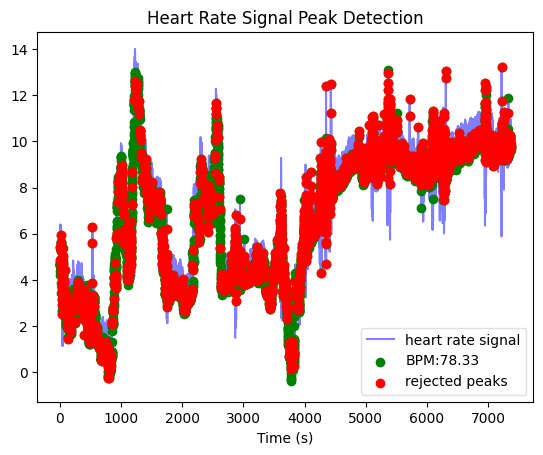

In [39]:
hp.plotter(working_data, measures)

In [53]:
hrData = test['LA-RA (mV)']

In [54]:
cleanedData = nk.ecg_clean(hrData, sampling_rate=fs)
cleanedData

array([-0.00319271,  0.01418256,  0.03548567, ..., -0.52078469,
       -0.43725904, -0.0273313 ])

In [64]:
rPeaks = nk.ecg_peaks(cleanedData, sampling_rate=fs)
rPeaks


(        ECG_R_Peaks
 0                 0
 1                 0
 2                 0
 3                 0
 4                 0
 ...             ...
 227816            0
 227817            0
 227818            0
 227819            0
 227820            0
 
 [227821 rows x 1 columns],
 {'ECG_R_Peaks': array([    14,     30,     46, ..., 227735, 227764, 227792]),
  'sampling_rate': 30.911637525938414})

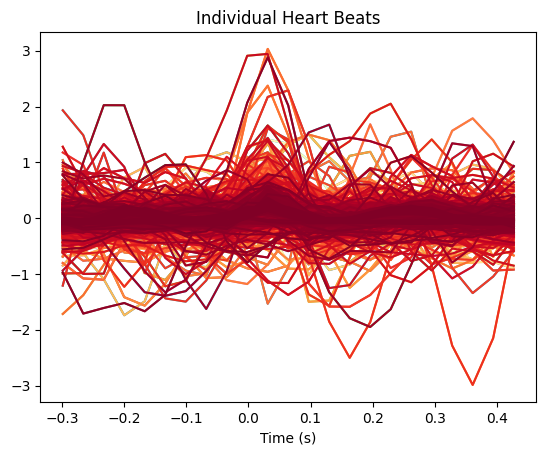

In [57]:
qrs_epochs = nk.ecg_segment(cleanedData, rpeaks=None, sampling_rate=fs, show=True)

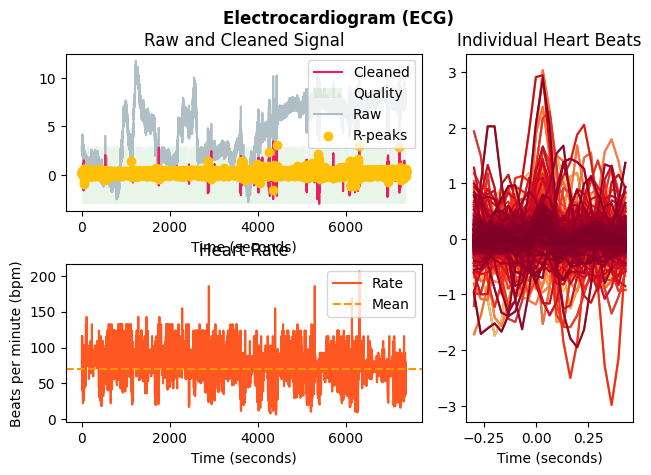

In [58]:
signals, info = nk.ecg_process(hrData, sampling_rate=fs)

nk.ecg_plot(signals, sampling_rate=fs, show_type='default')